In [20]:
import pandas as pd

df=pd.read_csv("data.csv")

df.head(20)

,Gender,Pressure
0,Male,1.0
1,Male,1.0
2,Male,1.0
3,Male,1.0
4,Male,1.0
5,Male,1.0
6,Male,1.0
7,Male,1.0
8,Male,1.0
9,Male,1.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38267 entries, 0 to 38266
Data columns (total 2 columns):
Gender      33600 non-null object
Pressure    37694 non-null float64
dtypes: float64(1), object(1)
memory usage: 598.0+ KB


In [22]:
df.isnull().sum()

Gender      4667
Pressure     573
dtype: int64

In [23]:
df=df.dropna(subset=['Gender', 'Pressure'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 33062 entries, 0 to 38260
Data columns (total 2 columns):
Gender      33062 non-null object
Pressure    33062 non-null float64
dtypes: float64(1), object(1)
memory usage: 774.9+ KB


In [24]:
df.head(20)

,Gender,Pressure
0,Male,1.0
1,Male,1.0
2,Male,1.0
3,Male,1.0
4,Male,1.0
5,Male,1.0
6,Male,1.0
7,Male,1.0
8,Male,1.0
9,Male,1.0


In [25]:
df=df[df['Pressure']!=1]

df.head(20)

,Gender,Pressure
15919,Male,0.003922
15920,Male,0.003922
15921,Male,0.003922
15922,Male,0.003922
15923,Male,0.003922
15924,Male,0.003922
15925,Male,0.003922
15926,Male,0.003922
15927,Male,0.003922
15928,Male,0.003922


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2041 entries, 15919 to 28562
Data columns (total 2 columns):
Gender      2041 non-null object
Pressure    2041 non-null float64
dtypes: float64(1), object(1)
memory usage: 47.8+ KB


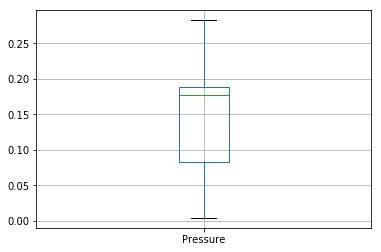

In [27]:
df.boxplot(column=['Pressure'])

In [28]:
Q1 =  df['Pressure'].quantile(0.25)
Q3 = df['Pressure'].quantile(0.75)
IQR = Q3 - Q1
df = df[df.loc[:,'Pressure'] < Q3+1.5*IQR]
df = df[df.loc[:,'Pressure'] > Q1-1.5*IQR]

In [29]:
df = df[df.loc[:,'Pressure'] > 0.01]

df.head(20)


,Gender,Pressure
17438,Male,0.282353
17439,Male,0.282353
17440,Male,0.282353
17441,Male,0.282353
17442,Male,0.282353
17444,Male,0.282353
17445,Male,0.274510
17446,Male,0.282353
17447,Male,0.274510
17448,Male,0.282353


In [30]:
#splitting data into training and test
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import numpy as np


X = df['Pressure']
y = df['Gender']


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 100 )

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)



In [31]:
# Creating the classifier object 

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100)  
clf_gini.fit(X_train, y_train) 
y_pred = clf_gini.predict(X_test) 

print ("Accuracy using Gini Index: ", accuracy_score(y_test,y_pred)*100) 

Accuracy using Gini Index:  86.29283489096574


In [32]:
clf_entropy = DecisionTreeClassifier( criterion = "entropy", random_state = 100) 
clf_entropy.fit(X_train, y_train) 
y1_pred = clf_gini.predict(X_test) 

print ("Accuracy using Entropy: ", accuracy_score(y_test,y1_pred)*100) 

Accuracy using Entropy:  86.29283489096574


In [33]:
import pandas as pd
import numpy as np
y_pred = np.array(y_pred)
y_test = np.array(y_test)
actual_predicted= pd.DataFrame({'actual': y_test, 'predicted': y_pred}, 
                               columns=['actual', 'predicted'])
print(actual_predicted)

     actual predicted
0      Male      Male
1      Male      Male
2      Male      Male
3      Male      Male
4      Male      Male
5      Male      Male
6      Male      Male
7      Male      Male
8      Male      Male
9    Female      Male
10   Female    Female
11     Male      Male
12     Male      Male
13   Female      Male
14   Female      Male
15     Male      Male
16     Male      Male
17     Male      Male
18     Male      Male
19     Male      Male
20     Male      Male
21     Male      Male
22     Male      Male
23     Male      Male
24     Male      Male
25     Male      Male
26   Female      Male
27     Male      Male
28   Female    Female
29     Male      Male
..      ...       ...
291    Male      Male
292    Male      Male
293    Male      Male
294    Male      Male
295    Male      Male
296    Male      Male
297    Male      Male
298    Male      Male
299    Male      Male
300    Male      Male
301    Male      Male
302  Female      Male
303    Male      Male
304    Mal